# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

client_data = pd.read_csv('financeiro_trabalhado.csv')
x = client_data.drop(columns = 'mau_True')
y = client_data['mau_True']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)





#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

70


<Figure size 2000x1500 with 0 Axes>

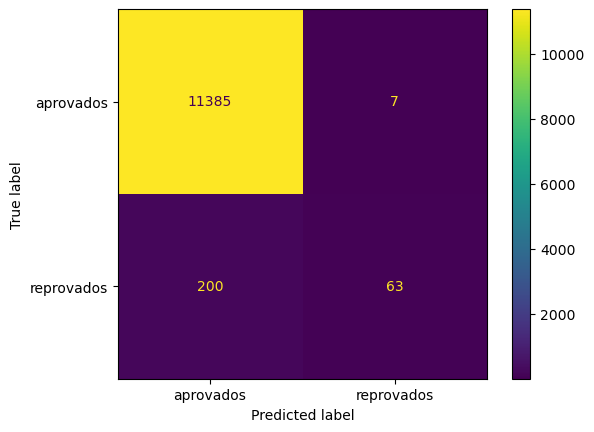

In [124]:
clf = DecisionTreeClassifier(random_state = 100)
clf.fit(x,y)
plt.figure(figsize=(20,15))
# plot_tree(clf, filled = True, class_names = ['bom', 'mau'], feature_names = x.columns);
#tive que deixar como comentário pois o jupyther não está "aguentando o tranco". Provavelmente porque eu "booleanifiquei" as variáveis numéricas
#durante o exercício anterior...

y_train_predict = clf.predict(x_train)
print(predict.sum())
matrix = ConfusionMatrixDisplay.from_predictions(y_train, y_train_predict, display_labels= ['aprovados','reprovados'])


Para classificar a nossa acuracia na base de treino, fazemos o seguinte: somamos nossas predições acertadas, e dividimos pelo total de casos avaliados. OU seja, utilizando os dados da matrix acima:

In [128]:
acuracia_modelo_treino = (11385+63)/(11385+63+200+7)
print(acuracia_modelo_treino)

#Conseguimos uma acuracia altíssima, de 98%! Mas isto é na nossa base de testes, então nossos dados podem estar sofrendo de overfitting. Vamos checar se
#nossa acurácia se mantém na base de teste:

0.9822393822393822


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

70


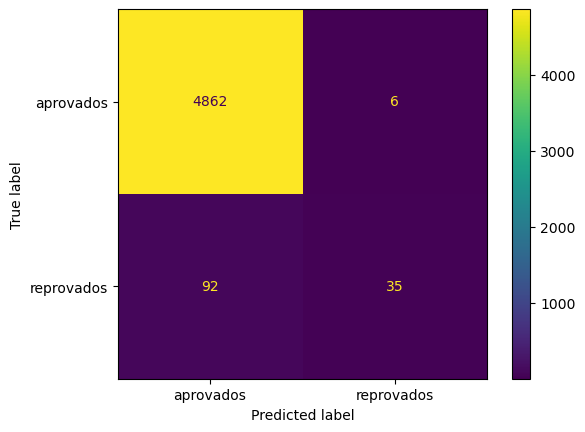

In [130]:
y_test_predict = clf.predict(x_test)
print(predict.sum())
matrix = ConfusionMatrixDisplay.from_predictions(y_test, y_test_predict, display_labels= ['aprovados','reprovados'])

Semelhantemente, calculamos a acurácia:

In [132]:
acuracia_test = (4862+35)/(4862+35+6+92)
print(acuracia_test)
#Incrivel! Obtivemos uma variação de acuracia de 0.002%, o que é extremamente acurado, uma variação quase desprezível de acurácia, especialmente
#considerando possiveis vícios na base de dados, tanto de treino, quanto de teste. Embora não estejamos munidos de ferramentas para isto, suponho que
#seja sensato afirmar que nossa diferença de precisão deve estar dentro da margem de erro...

0.9803803803803803


Uma impressão que deixo aqui, e não excluirei, mesmo que se prove errada, é que a limitação que iremos fazer a seguir, á pedido do exercício, será possivelmente danosa à nossa análise, tendo em vista a quantidade enorme de colunas que possuímos, em virtude da booleanização das variáveis numéricas... vejamos:

70


<Figure size 2000x1500 with 0 Axes>

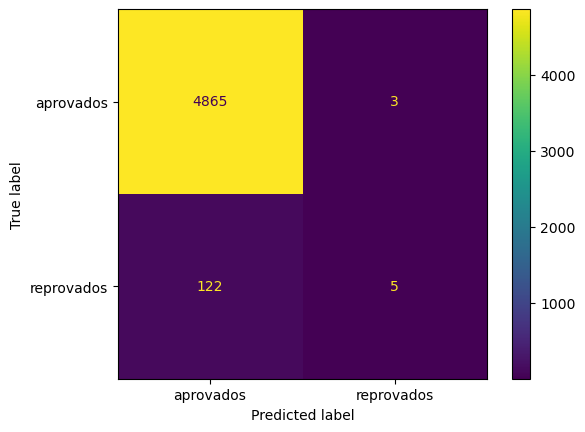

In [140]:
clf = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 5, random_state = 123)
clf.fit(x,y)
plt.figure(figsize=(20,15))


y_test_predict = clf.predict(x_test)
print(predict.sum())
matrix = ConfusionMatrixDisplay.from_predictions(y_test, y_test_predict, display_labels= ['aprovados','reprovados'])

Vejamos, então, nossa acurácia:

In [142]:
acuracia_restrita = (5+4865)/(5+4865+122+3)
print(acuracia_restrita)


0.974974974974975


Visto que não faz sentido fazer diferenciação entre teste e geral se iremos conceder a todos, vejamos, nossa acurácia sem aplicar nada, se limita e verificar quantos erros cometeríamos dentro da nossa base total de dados ao simplesmente emprestar a todos os clientes, bons e maus. Vejamos:

In [156]:
print(client_data.shape)
print(client_data['mau_True'].sum())
# Nossa acuracia caso emprestássemos a todos seria então os nossos acertos dividido pelo nosso total, ou (total-(erros))/total. Assim:
acuracia_sem_modelo = (16650-390)/16650
print(acuracia_sem_modelo)

(16650, 52)
390
0.9765765765765766


A nossa acuracia sem modelo se restringe a 0.976, que é menor que a acuracia de todos os nossos modelos preditivos. Portanto, os nossos modelos, apesar de possuirem suas limitações, são eficientes em previnir a chance de concedermos crédito a um mau pagador...